<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praca Domowa nr 4
Wizualizacja kompromisu między bias'em a wariancją.

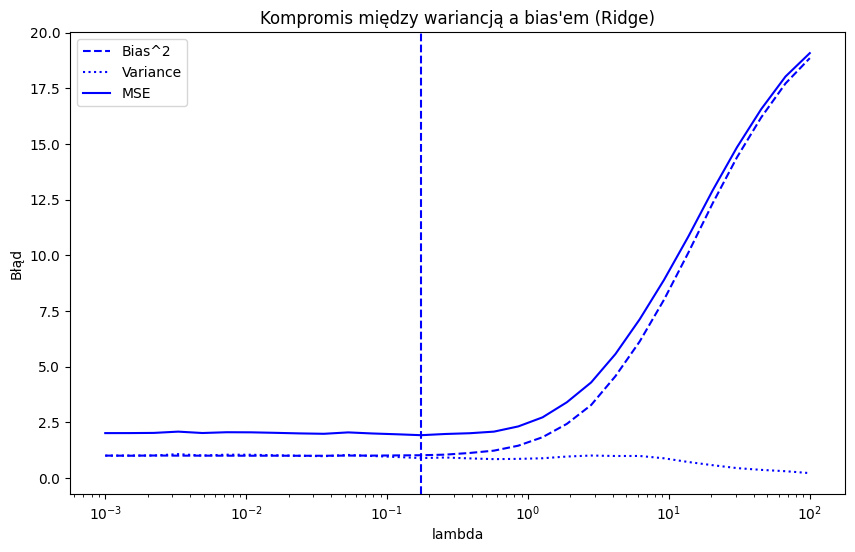

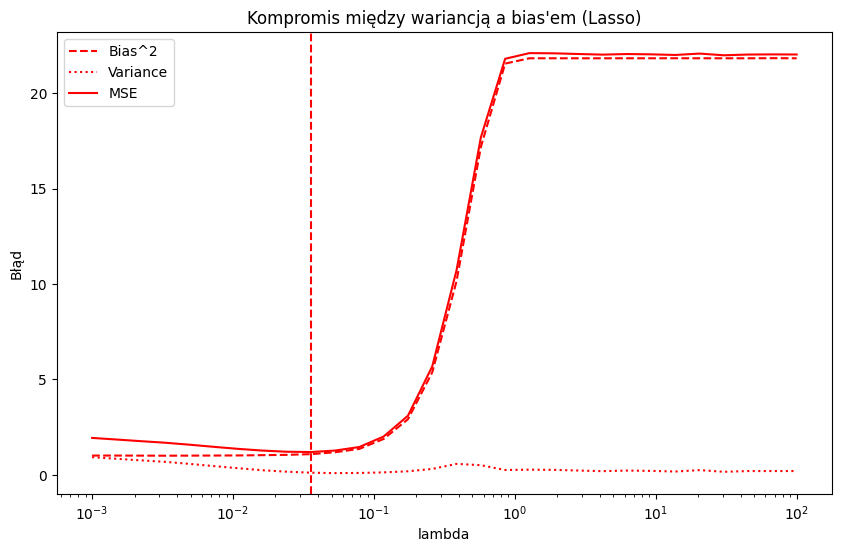

Najlepsza lambda dla Ridge: 0.1743328822199989
Najlepsza lambda dla Lasso: 0.03562247890262444


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(420)

#generujemy dane
n_samples, n_features = 100, 50
n_nonzero = 5

#prawdziwe współczynniki, tylko kilka pierwszych są niezerowe
beta_true = np.zeros(n_features)
beta_true[:n_nonzero] = np.random.uniform(5, 10, size=n_nonzero)


def generate_data(n_samples, beta_true, epsilon_std=1.0):
    X = np.random.uniform(0, 1, size=(n_samples, len(beta_true)))
    epsilon = np.random.normal(0, epsilon_std, size=n_samples)
    y = np.dot(X, beta_true) + epsilon
    return X, y




X_test, y_test = generate_data(5000, beta_true)
#lambdy na skali geometrycznej
lambdas = np.logspace(-3, 2, 30)

#liczymi bias, wariancje i mse
def compute_bias_variance(model_class, lambdas, X_test, y_test, n_repeats=150):

    bias_list, variance_list, mse_list = [], [], []


    for lam in lambdas:
        preds = []

        for _ in range(n_repeats):
            X_train, y_train = generate_data(n_samples, beta_true)
            model = model_class(alpha=lam)
            model.fit(X_train, y_train)
            preds.append(model.predict(X_test))


        preds = np.array(preds)
        pred_mean = np.mean(preds, axis=0)
        bias2 = np.mean((pred_mean - y_test) ** 2)
        variance = np.mean(np.var(preds, axis=0))
        mse = bias2 + variance


        bias_list.append(bias2)
        variance_list.append(variance)
        mse_list.append(mse)

        opt_lambda = lambdas[np.argmin(mse_list)]

    return bias_list, variance_list, mse_list, opt_lambda


#ridge i lasso
ridge_bias, ridge_var, ridge_mse, ridge_opt_lambda = compute_bias_variance(Ridge, lambdas, X_test, y_test)
lasso_bias, lasso_var, lasso_mse, lasso_opt_lambda = compute_bias_variance(Lasso, lambdas, X_test, y_test)


#wykres dla ridge
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_bias, '--b', label='Bias^2')
plt.plot(lambdas, ridge_var, ':b', label='Variance')
plt.plot(lambdas, ridge_mse, '-b', label='MSE')
plt.axvline(ridge_opt_lambda, color='b', linestyle='--')
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Błąd")
plt.title("Kompromis między wariancją a bias'em (Ridge)")
plt.legend()
plt.show()

#wykres dla lasso
plt.figure(figsize=(10, 6))
plt.plot(lambdas, lasso_bias, '--r', label='Bias^2')
plt.plot(lambdas, lasso_var, ':r', label='Variance')
plt.plot(lambdas, lasso_mse, '-r', label='MSE')
plt.axvline(lasso_opt_lambda, color='r', linestyle='--')
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Błąd")
plt.title("Kompromis między wariancją a bias'em (Lasso)")
plt.legend()
plt.show()

print(f"Najlepsza lambda dla Ridge: {ridge_opt_lambda}")
print(f"Najlepsza lambda dla Lasso: {lasso_opt_lambda}")


#1. Rozład MSE
Z The Elements of Statistical Learning dowiadujemy się że :

MSE = Bias^2 + Wariancja + Błąd

Wysoki bias --> model zbyt prosty

Wysoka wariancja --> model zbyt dopasowany

#2. Czy regularyzacja prowadzi to optymalnego punktu, gdzie MSE jest zminimalizowane?

Na wykresie widzimy, że bias rośnie, a wariancja maleje, co mogliśmy się spodziewać z definicji obydwu. Dlatego właśnie MSE przyjmuje kształt U oraz przyjmuje pewne minimum.


#3. Jaka jest różnica pomiędzy Ridge i Lasso w kompromisie wariancji i bias'u?

Regresja Ridge ściąga płynnie współczynniki w kierunku zera, więc nie eliminuje zmiennych i płynnie osiąga szukany kompromis. Regresja Lasso ustawia niektóre nieistotne współyczynniki na 0 i jak widzimy na wykresie powoduje szybki wzrost bias'u w przeciwieństwie do płynnego wzrostu bias'u przy Ridge.

#4. Kiedy Ridge jes lepsze od Lasso i odwrotnie?

W przypadku silnej współliniowości danych lepszym wyborem będzie Ridge, ponieważ nie eliminuje cech, tylko zmniejsza ich wagi, co pozwala uniknąć niestabilności w przypadku skorelowanych zmiennych.

Jeśli mamy rzadką reprezentacje cech, czyli tylko kilka cech jest ważnych dla modelu lepszym wyborem będzie Lasso, ponieważ mniej istotne cechy ustawia na 0, co jest bardziej oszczędne i szybsze.

W naszym przypadku powyżej większość współczynników to zera, więc lepszym wyborem jest Lasso.